In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
categorical_col = train.columns[train.dtypes == np.object]
print categorical_col
cat_train = train[categorical_col]

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')


In [4]:
## Null value detection table

In [4]:
cat_train.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


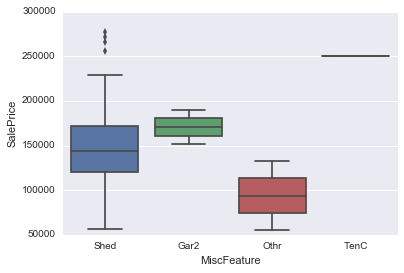

In [5]:
## Let`s check out how dows the values in MiscFeature vary the SalePrice

print train['MiscFeature'].value_counts()
sns.boxplot(x= 'MiscFeature', y= 'SalePrice', data= train)

In [6]:
## The "MiscFeature" category has a large no. of null values which doesnot give any idea about how that feature is affecting
## the house sale price. Thus we can remove it
train.drop('MiscFeature',1,inplace = 1)

In [7]:
## For categorical vaiables "Alley", "FireplaceQu", "PoolQC" and "Fence" NA means "that category is not present in that house
## So let`s just update it as "No" + "particular category" 

train['Alley'].fillna('No Alley',inplace = 1)
train['FireplaceQu'].fillna("No Fireplace", inplace = 1)
train['PoolQC'].fillna('No Pool',inplace = 1)
train['Fence'].fillna('No Fence',inplace = 1)

## The case is similar with these below categorical variables as well
train['GarageType'].fillna('No Garage',inplace = True)
train['GarageCond'].fillna('No Garage',inplace = True)
train['GarageFinish'].fillna('No Garage',inplace = True)
train['GarageQual'].fillna('No Garage',inplace = True)
train['BsmtCond'].fillna('No Basement',inplace = True)
train['BsmtQual'].fillna('No Basement',inplace = True)
train['BsmtExposure'].fillna('No Basement',inplace = True)
train['BsmtFinType1'].fillna('No Basement',inplace = True)
train['BsmtFinType2'].fillna('No Basement',inplace = True)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


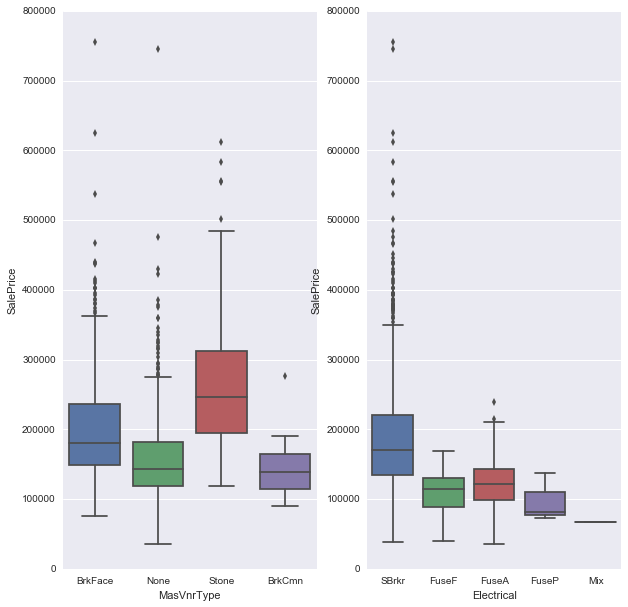

In [9]:
## The categories which still have null values are "Electrical" and "MasVnrType".
## But they have very less no of null values which can be taken care of at later points
print cat_train['Electrical'].value_counts()
print cat_train['MasVnrType'].value_counts()

sns.set(rc={"figure.figsize": (10, 10)},font_scale=1)
f, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(x= 'MasVnrType', y= 'SalePrice', data= train, ax= ax1)
sns.boxplot(x='Electrical', y= 'SalePrice', data= train, ax= ax2)

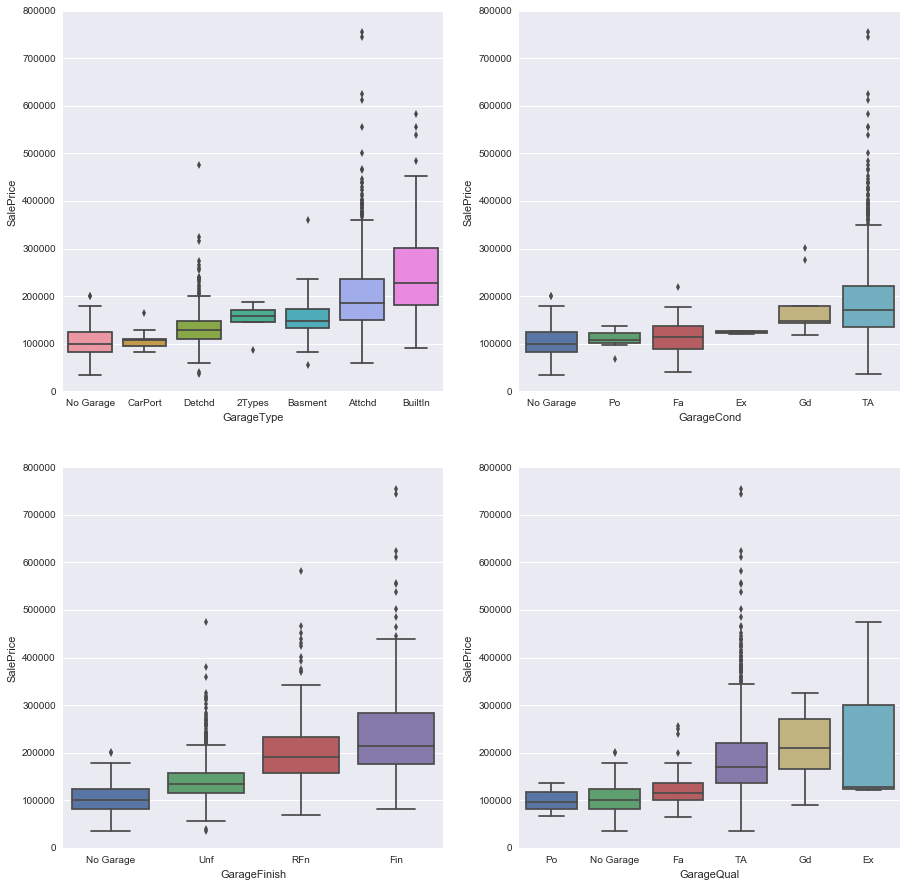

In [10]:
sns.set(rc={"figure.figsize": (15, 15)},font_scale=1)
f, axarr = plt.subplots(2, 2)

sns.boxplot(x= 'GarageType', y= 'SalePrice', data= train, ax= axarr[0,0], order= train.groupby('GarageType')['SalePrice'].mean().sort_values().index)
sns.boxplot(x= 'GarageCond', y= 'SalePrice', data= train, ax= axarr[0,1], order= train.groupby('GarageCond')['SalePrice'].mean().sort_values().index)
sns.boxplot(x= 'GarageFinish', y= 'SalePrice', data= train, ax= axarr[1,0], order= train.groupby('GarageFinish')['SalePrice'].mean().sort_values().index)
sns.boxplot(x= 'GarageQual', y= 'SalePrice', data= train, ax= axarr[1,1] ,order= train.groupby('GarageQual')['SalePrice'].mean().sort_values().index)

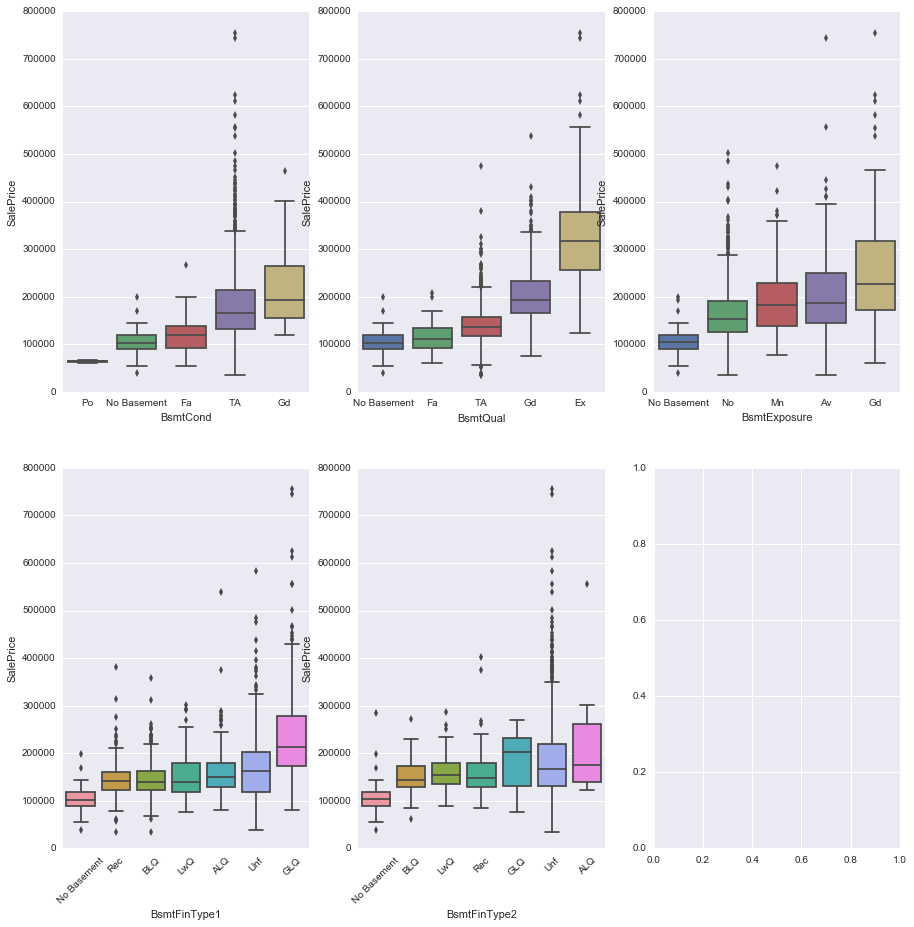

In [11]:
f, axarr = plt.subplots(2, 3)

sns.boxplot(x= 'BsmtCond', y= 'SalePrice', data= train, ax= axarr[0,0], order= train.groupby('BsmtCond')['SalePrice'].mean().sort_values().index)
sns.boxplot(x= 'BsmtQual', y= 'SalePrice', data= train, ax= axarr[0,1], order= train.groupby('BsmtQual')['SalePrice'].mean().sort_values().index)
sns.boxplot(x= 'BsmtExposure', y= 'SalePrice', data= train, ax= axarr[0,2], order= train.groupby('BsmtExposure')['SalePrice'].mean().sort_values().index)
g1 = sns.boxplot(x= 'BsmtFinType1', y= 'SalePrice', data= train, ax= axarr[1,0], order= train.groupby('BsmtFinType1')['SalePrice'].mean().sort_values().index)
g2 = sns.boxplot(x= 'BsmtFinType2', y= 'SalePrice', data= train, ax= axarr[1,1], order= train.groupby('BsmtFinType2')['SalePrice'].mean().sort_values().index)
g1.set_xticklabels(g1.get_xticklabels(), rotation= 45);
g2.set_xticklabels(g2.get_xticklabels(), rotation= 45);

In [16]:
num_col = train.columns[train.dtypes != np.object]

num_train = train[num_col]

print num_col

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')


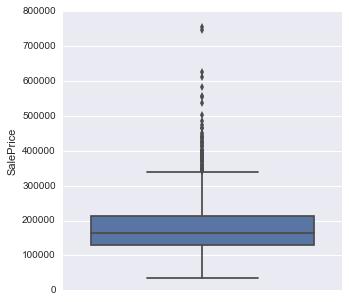

In [19]:
sns.set(rc={"figure.figsize": (5,5)},font_scale=1)

sns.boxplot(y ='SalePrice',data= train)

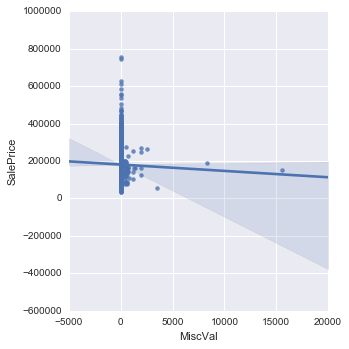

In [23]:
sns.lmplot(x= 'MiscVal', y= 'SalePrice', data= train) 

In [25]:
num_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [47]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max      1600.000000
Name: MasVnrArea, dtype: float64

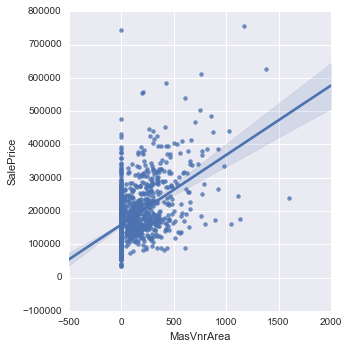

In [48]:
sns.lmplot('MasVnrArea','SalePrice',train)

ValueError: cannot convert float NaN to integer

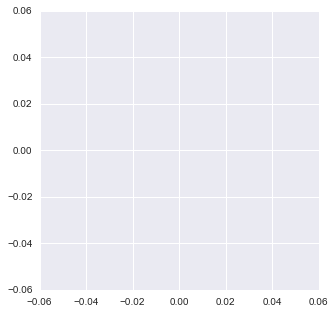

In [49]:
sns.distplot(train['MasVnrArea'])

In [27]:
train['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%              NaN
50%              NaN
75%              NaN
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [38]:
print train['GarageYrBlt'].mode()
print train['GarageYrBlt'].median()

0    2005.0
dtype: float64
1980.0


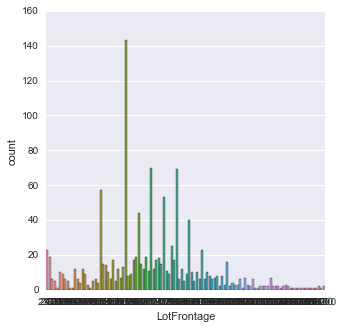

In [45]:
sns.countplot(train['LotFrontage'])

In [29]:
sum(train['GarageYrBlt'] == train['YearBuilt'])

1089

In [30]:
sum(train['GarageYrBlt'] == train['YearRemodAdd'])

725

In [31]:
sum(train['YearBuilt'] == train['YearRemodAdd'])

764

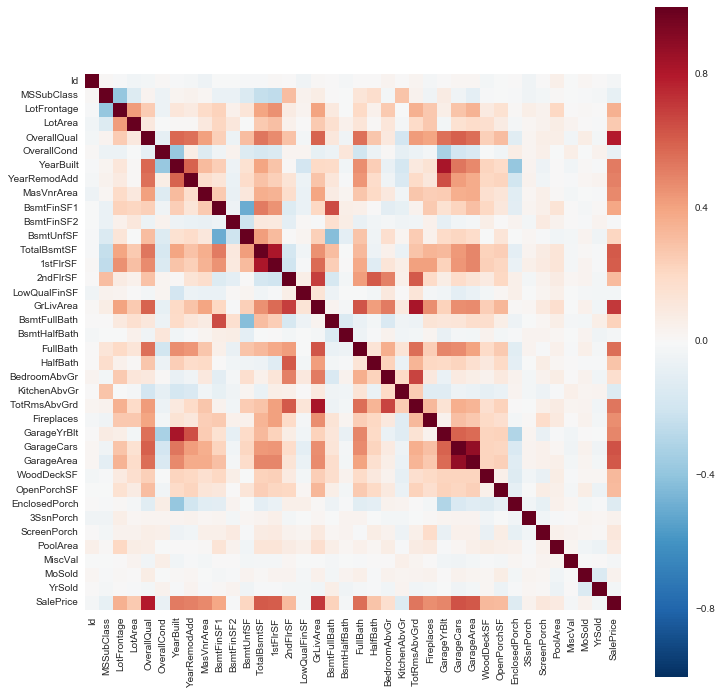

In [32]:
correlation_tab = train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_tab, vmax=1, square=True)

In [33]:
sale_price_tab = correlation_tab['SalePrice'].to_dict()
del sale_price_tab['SalePrice']

In [34]:
sale_price_tab

{'1stFlrSF': 0.6058521846919166,
 '2ndFlrSF': 0.31933380283206614,
 '3SsnPorch': 0.044583665335747917,
 'BedroomAbvGr': 0.16821315430074149,
 'BsmtFinSF1': 0.38641980624215627,
 'BsmtFinSF2': -0.011378121450215216,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtHalfBath': -0.016844154297359294,
 'BsmtUnfSF': 0.214479105546969,
 'EnclosedPorch': -0.12857795792595636,
 'Fireplaces': 0.46692883675152419,
 'FullBath': 0.5606637627484452,
 'GarageArea': 0.62343143891835984,
 'GarageCars': 0.64040919725834899,
 'GarageYrBlt': 0.48636167748786213,
 'GrLivArea': 0.70862447761265113,
 'HalfBath': 0.2841076755947784,
 'Id': -0.021916719443431112,
 'KitchenAbvGr': -0.13590737084214169,
 'LotArea': 0.26384335387140628,
 'LotFrontage': 0.35179909657067854,
 'LowQualFinSF': -0.025606130000680152,
 'MSSubClass': -0.08428413512659523,
 'MasVnrArea': 0.47749304709571072,
 'MiscVal': -0.021189579640303789,
 'MoSold': 0.046432245223819363,
 'OpenPorchSF': 0.31585622711605577,
 'OverallCond': -0.077855894048

In [4]:
print train.columns[train.dtypes == np.object]
print len(train.columns[train.dtypes == np.object])

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')
43


In [16]:
cat_col = list(train.columns[train.dtypes == np.object])
print cat_col
cat_col.remove('MiscFeature')
print cat_col

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Fun

In [20]:
test.isnull().sum()[test.dtypes == np.object]

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64